In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy
from datetime import datetime as dt 

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

from glob import glob

from scipy.stats.stats import pearsonr

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Display selected data

TypeError: can't multiply sequence by non-int of type 'float'

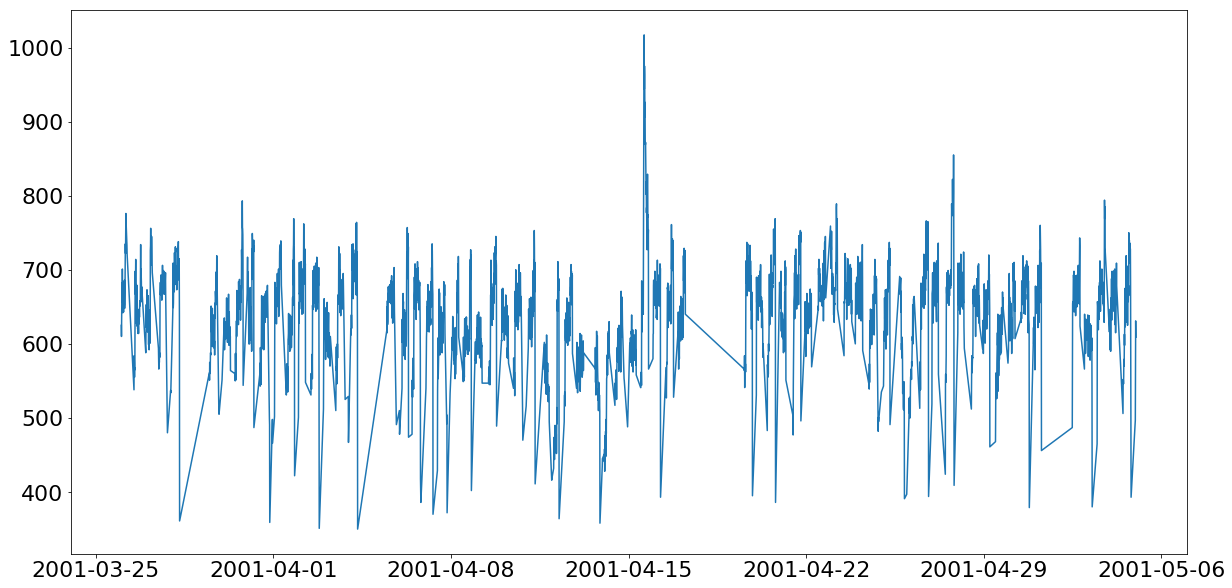

In [19]:
FD = '2001-4-12'
#FD = '2012-9-4'
#FD = '2007-6-22'
#FD = '2008-8-22'
#FD = '2005-9-10'
#FD = '2012-3-8'

days_view = 10

plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

df = pd.read_csv('~/Downloads/cr10_selection.csv', sep=',', header=7, parse_dates=['date'] )
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
plt.plot(df['count'])

datetime.timedelta(days=1)
from_time = str(pd.to_datetime(FD) + datetime.timedelta(days=-days_view))
to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))

#plt.plot(df.loc[from_time: to_time]['count'],lw='1', markersize=10,marker='.',linestyle=':',label='Liulin')
df.loc[from_time: to_time]['count'].plot(lw='1', markersize=10,marker='.',linestyle=':',label='Liulin')

plt.axvline(x=pd.to_datetime(FD), color='purple', ls='--') # plot dashed vertical line at the FD time

plt.ylabel('Count [-]') # Y axis label
plt.xlabel('UT') # X axis label
plt.legend(loc=4)

In [18]:
df[from_time: to_time]['count']


date
2001-04-02 00:08:00    656.0
2001-04-02 00:18:00    628.0
2001-04-02 00:28:00    710.0
2001-04-02 00:38:00    667.0
2001-04-02 00:48:00    669.0
2001-04-02 00:58:00    657.0
2001-04-02 01:08:00    696.0
2001-04-02 01:18:00    664.0
2001-04-02 01:28:00    670.0
2001-04-02 01:38:00    692.0
2001-04-02 01:48:00    677.0
2001-04-02 01:58:00    682.0
2001-04-02 02:08:00    711.0
2001-04-02 02:18:00    654.0
2001-04-02 02:28:00    647.0
2001-04-02 02:38:00    664.0
2001-04-02 02:48:00    652.0
2001-04-02 02:58:00    640.0
2001-04-02 03:08:00    674.0
2001-04-02 03:18:00    658.0
2001-04-02 03:28:00    675.0
2001-04-02 03:38:00    701.0
2001-04-02 03:48:00    641.0
2001-04-02 03:58:00    686.0
2001-04-02 04:08:00    663.0
2001-04-02 04:18:00    690.0
2001-04-02 04:28:00    711.0
2001-04-02 04:38:00    762.0
2001-04-02 04:48:00    715.0
2001-04-02 04:58:00    727.0
                       ...  
2001-04-21 15:29:00    685.0
2001-04-21 15:39:00    671.0
2001-04-21 15:49:00    688.0
2001-04-2

# Plot map

In [8]:
import time, calendar, datetime, numpy
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import urllib, os

def createColourbar(lwr, upr):
    """Create a colourbar with limits of lwr and upr"""
    cax, kw = matplotlib.colorbar.make_axes(mp.gca())
    norm = matplotlib.colors.Normalize(vmin = lwr, vmax = upr, clip = False)

    c = matplotlib.colorbar.ColorbarBase(cax, cmap=mp.spectral(), norm=norm)
    return c

plt.figure(figsize=(20,20))
matplotlib.rcParams.update({'font.size': 22})

# World map
m = Basemap(llcrnrlon=-100,llcrnrlat=0,urcrnrlon=140,urcrnrlat=70,projection='mill')

df = pd.read_csv('~/Downloads/cr10_selection.csv', sep=',', header=7, parse_dates=['date'] )
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

#df = df.resample('10 min', how='mean', base=0)
#df.dropna(inplace=True)
#df = df.loc[df['H']<10].loc[df['H']>0]
#df = df.loc['2010':'2011']
#df = df.loc['2010-07-01':'2011-07-01']
#df = df.loc[df['lat']<5].loc[df['lat']>0]
#df = df.loc[df['lon']<20].loc[df['lon']>0]
#df = df.loc[df['alt']>35000].loc[df['alt']<36000]

x, y = m(df['lon'].tolist(),df['lat'].tolist())

#m.drawcoastlines()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff',zorder=0)
m.drawparallels(np.arange(-90.,99.,10.),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180.,180.,20.),labels=[0,0,1,0])
im1 = m.scatter(x,y,c=df['H'].tolist(),s=10,marker='o', linewidth='0', cmap='jet')

cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label(r'dH*(10)/dt [$\mu$Sv h$^-$$^1$]')
plt.show()

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


TypeError: Cannot cast array data from dtype('S1') to dtype('float64') according to the rule 'safe'

<Figure size 1440x1440 with 2 Axes>

## Plot resampled data

In [13]:
plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

FD = '2001-4-12'
#FD = '2012-9-4'
#FD = '2007-6-22'
#FD = '2008-8-22'
#FD = '2005-9-10'
#FD = '2015-8-4'

days_view = 2000

plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

df2 = pd.read_csv('~/Downloads/cr10_selection.csv', sep=',', header=7, parse_dates=['date'] )
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')

#df2 = df2.loc[df2['counter']>30] # filter for long flights

datetime.timedelta(days=1)
from_time = str(pd.to_datetime(FD) + datetime.timedelta(days=-days_view))
to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))

#Liulin
#df2 = df2.loc[df2['alt']>34000]

period = '6 H'

df4 = df2.resample(period, how='mean')
df5 = df2.resample(period, how=np.std)

#df4 = df4.loc['2010-07-01':'2011-07-01']
#df5 = df5.loc['2010-07-01':'2011-07-01']

plt.errorbar(df4[from_time: to_time].index,df4[from_time: to_time]['count'], yerr=df5[from_time: to_time]['count'], lw='1', markersize=15,marker='.',linestyle='',label='Liulin')

plt.ylabel('[%]') # Y axis label
plt.xlabel('UT') # X axis label
#plt.legend(loc=4)

'''
B   business day frequency
C   custom business day frequency (experimental)
D   calendar day frequency
W   weekly frequency
M   month end frequency
BM  business month end frequency
MS  month start frequency
BMS business month start frequency
Q   quarter end frequency
BQ  business quarter endfrequency
QS  quarter start frequency
BQS business quarter start frequency
A   year end frequency
BA  business year end frequency
AS  year start frequency
BAS business year start frequency
H   hourly frequency
T   minutely frequency
S   secondly frequency
L   milliseconds
U   microseconds
'''


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


'\nB   business day frequency\nC   custom business day frequency (experimental)\nD   calendar day frequency\nW   weekly frequency\nM   month end frequency\nBM  business month end frequency\nMS  month start frequency\nBMS business month start frequency\nQ   quarter end frequency\nBQ  business quarter endfrequency\nQS  quarter start frequency\nBQS business quarter start frequency\nA   year end frequency\nBA  business year end frequency\nAS  year start frequency\nBAS business year start frequency\nH   hourly frequency\nT   minutely frequency\nS   secondly frequency\nL   milliseconds\nU   microseconds\n'

Error in callback <function post_execute at 0x7faeba7be0c8> (for post_execute):


TypeError: Cannot cast array data from dtype('S1') to dtype('float64') according to the rule 'safe'

<Figure size 1440x720 with 0 Axes>

TypeError: Cannot cast array data from dtype('S1') to dtype('float64') according to the rule 'safe'

<Figure size 1440x720 with 1 Axes>

## Plot histogram

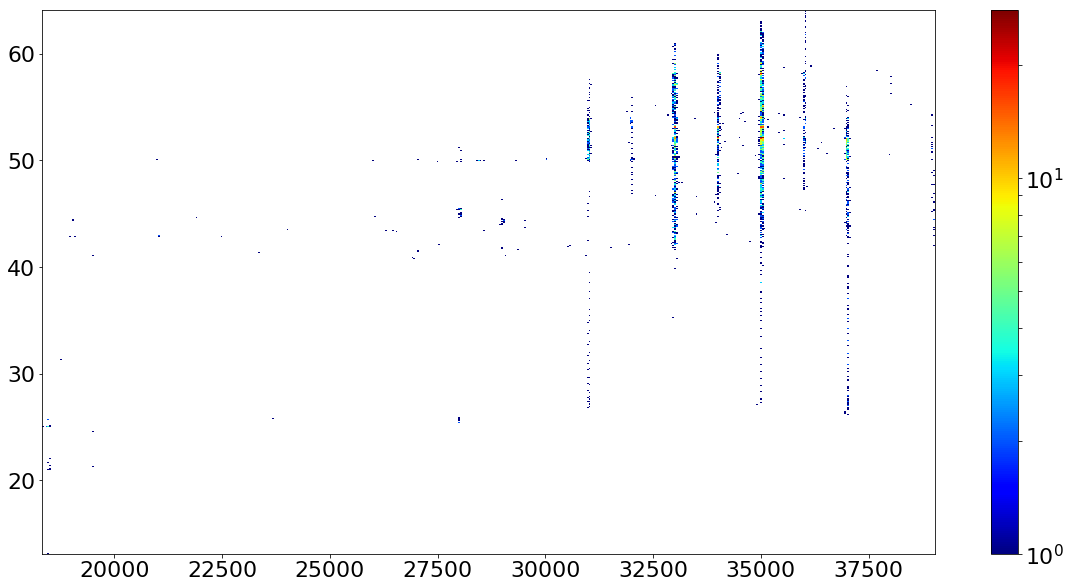

In [7]:
plt.figure(figsize=(20, 10))
matplotlib.rcParams.update({'font.size': 22})

df = pd.read_csv('~/Downloads/cr10_selection.csv', sep=',', header=7, parse_dates=['date'] )
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

plt.hist2d(df['alt'], df['lat'], bins=(500,500), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.colorbar()